## Introduction to Deep Learning 
# Part 4 - Multilayer Perceptron with Keras
### Build and visualize Simple feed forward dense network with Mnist data

In [190]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import utils_plot as uplot
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, log_loss

%matplotlib inline  

In [166]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

def print_stats(ytest, ypred):
    
    print("Accuracy: {:.5f}, Cohen's Kappa Score: {:.5f}".format(
        accuracy_score(ytest, ypred), 
        cohen_kappa_score(ytest, ypred, weights="quadratic")))
    print("Confusion Matrix:")
    print(confusion_matrix(ytest, ypred))
    print("Classification Report:")
    print(classification_report(ytest, ypred))

## Lets start Keras
In the Mnist classification example, we saw that the net basically learn templates.<br>
This is not robust enough for generalization. <br>
To generalize, we want the neural network to learn **features**. <br>
For that we will need deeper and more complexed networks.<br>
Lets build our first neural network with Keras.

In [167]:
import keras
# Keras has many build in data sets
from keras.datasets import mnist
# Sequential is the basic feed forward neural network (FFN)
from keras.models import Sequential
# Dense is fully connected layer
# Dropout is a "noising" layer, to prevent over feet.
from keras.layers import Dense, Dropout
# Read about optimizers in keras documentation
from keras.optimizers import RMSprop

In [168]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

## Circle  binary classification example
### Create, normalize and split data

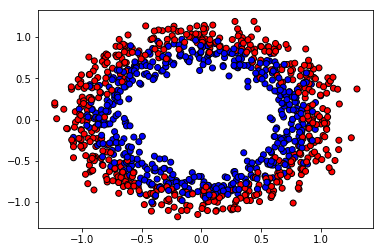

In [169]:
figure = plt.figure()
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
X, y = make_circles(n_samples=1000,noise=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,edgecolors='k')
    

In [170]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, 
                                                    random_state=42)
X_train.shape

(600, 2)

# exercise
1. Create model for classification of circles data. Same as we did in class
2. Try to improve the model.



### Build and compile keras model

In [171]:
batch_size = 20
num_classes = 2
epochs = 10

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(2,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_62 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 17        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [172]:


history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))



Train on 600 samples, validate on 400 samples
Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.6925 - acc: 0.5000 - val_loss: 0.6914 - val_acc: 0.4900
Epoch 2/10
600/600 [==============================] - 0s 93us/step - loss: 0.6895 - acc: 0.4950 - val_loss: 0.6907 - val_acc: 0.4900
Epoch 3/10
600/600 [==============================] - 0s 90us/step - loss: 0.6878 - acc: 0.5017 - val_loss: 0.6898 - val_acc: 0.4825
Epoch 4/10
600/600 [==============================] - 0s 85us/step - loss: 0.6863 - acc: 0.5033 - val_loss: 0.6892 - val_acc: 0.4775
Epoch 5/10
600/600 [==============================] - 0s 100us/step - loss: 0.6845 - acc: 0.5133 - val_loss: 0.6878 - val_acc: 0.4825
Epoch 6/10
600/600 [==============================] - 0s 83us/step - loss: 0.6837 - acc: 0.5117 - val_loss: 0.6870 - val_acc: 0.4775
Epoch 7/10
600/600 [==============================] - 0s 103us/step - loss: 0.6819 - acc: 0.5200 - val_loss: 0.6857 - val_acc: 0.4825
Epoch 8/10
600/600 [==

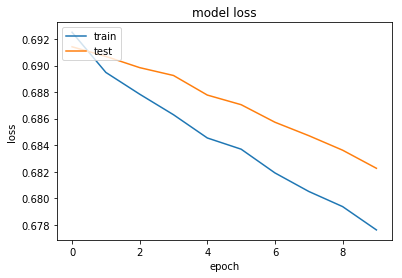

In [173]:
uplot.drow_history(history, 'loss')

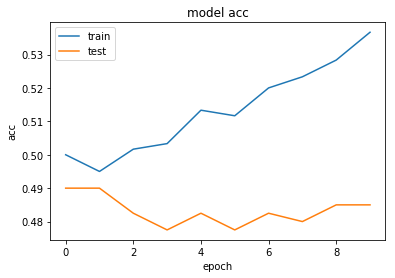

In [174]:
uplot.drow_history(history, 'acc')

## Evaluate model

In [175]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.682257194519
Test accuracy: 0.485


## Predict

In [176]:
pred_test = model.predict(X_test)
pred_test[0:5]

array([[ 0.48138747],
       [ 0.49261945],
       [ 0.49666923],
       [ 0.46024615],
       [ 0.40336269]], dtype=float32)

In [177]:
#y_pred_test=np.argmax(pred_test, axis=1)
y_pred_test = np.where(pred_test > 0.5, 1, 0).flatten()
y_pred_test[0:10], y_test[0:10]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64))

In [178]:
print_stats(y_test,y_pred_test )

Accuracy: 0.48500, Cohen's Kappa Score: 0.02182
Confusion Matrix:
[[172  15]
 [191  22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.92      0.63       187
           1       0.59      0.10      0.18       213

   micro avg       0.48      0.48      0.48       400
   macro avg       0.53      0.51      0.40       400
weighted avg       0.54      0.48      0.39       400



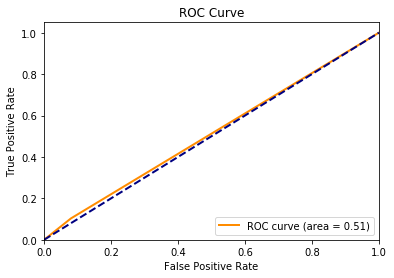

In [179]:
uplot.drow_roc_curve(y_test,y_pred_test)

In [180]:
## Improve model

In [181]:
batch_size = 50
epochs = 60

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(2,)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 16)                48        
_________________________________________________________________
dropout_23 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_65 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_24 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 17        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [182]:


history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))



Train on 600 samples, validate on 400 samples
Epoch 1/60
600/600 [==============================] - 1s 2ms/step - loss: 0.7061 - acc: 0.4633 - val_loss: 0.6981 - val_acc: 0.4850
Epoch 2/60
600/600 [==============================] - 0s 55us/step - loss: 0.6959 - acc: 0.4983 - val_loss: 0.6973 - val_acc: 0.4625
Epoch 3/60
600/600 [==============================] - 0s 52us/step - loss: 0.6910 - acc: 0.5083 - val_loss: 0.6968 - val_acc: 0.4600
Epoch 4/60
600/600 [==============================] - 0s 57us/step - loss: 0.6940 - acc: 0.4917 - val_loss: 0.6964 - val_acc: 0.4675
Epoch 5/60
600/600 [==============================] - 0s 63us/step - loss: 0.6918 - acc: 0.5150 - val_loss: 0.6958 - val_acc: 0.4575
Epoch 6/60
600/600 [==============================] - 0s 57us/step - loss: 0.6826 - acc: 0.5183 - val_loss: 0.6950 - val_acc: 0.4625
Epoch 7/60
600/600 [==============================] - 0s 53us/step - loss: 0.6956 - acc: 0.4967 - val_loss: 0.6944 - val_acc: 0.4675
Epoch 8/60
600/600 [====

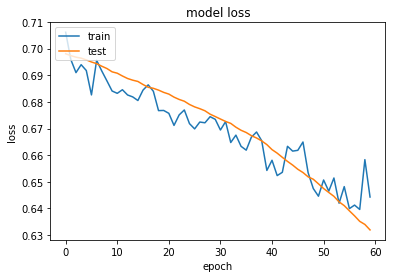

In [183]:
uplot.drow_history(history, 'loss')

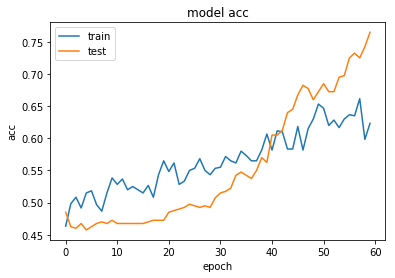

In [184]:
uplot.drow_history(history, 'acc')

## Evaluate model

In [185]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.631925487518
Test accuracy: 0.765


## Predict

In [186]:
pred_test = model.predict(X_test)
pred_test[0:5]

array([[ 0.3865397 ],
       [ 0.41202223],
       [ 0.5188126 ],
       [ 0.47070163],
       [ 0.39614424]], dtype=float32)

In [187]:
#y_pred_test=np.argmax(pred_test, axis=1)
y_pred_test = np.where(pred_test > 0.5, 1, 0).flatten()
y_pred_test[0:10], y_test[0:10]

(array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64))

In [188]:
print_stats(y_test,y_pred_test )

Accuracy: 0.76500, Cohen's Kappa Score: 0.53677
Confusion Matrix:
[[169  18]
 [ 76 137]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       187
           1       0.88      0.64      0.74       213

   micro avg       0.77      0.77      0.77       400
   macro avg       0.79      0.77      0.76       400
weighted avg       0.79      0.77      0.76       400



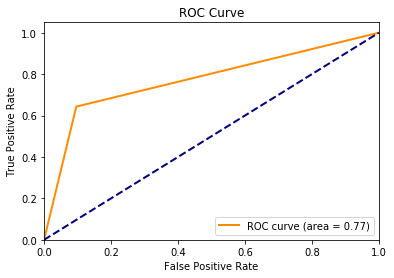

In [189]:
uplot.drow_roc_curve(y_test,y_pred_test)